#Project Objective:
In this project, three different unsupervised learning clustering algorithms such as, K-means, Nearest Neighbor (NN) and DBScan were implemented from scratch WITHOUT using any clustering libraries API.

#Datasets:


*   Dataset 1: <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;A 2D dataset consisting of 8 data points has been considered: A1=(2,10), A2=(2, 5), A3=(8,4), A4=(5,8), A5=(7,5), <br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;A6=(6,4), A7=(1,2), and A8=(4,9)
*   Dataset 2: <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Heart-disease data from Western Cape, South Africa (taken from a larger sample as described in Rousseauw et al,<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;1983, South African Medical Journal) with the following 9 features and 1 target:<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**sbp**: systolic blood pressure<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**tobacco**: cumulative tobacco usage(kg)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**ldl**: low density lipo-protein cholesterol<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**adiposity**<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**famhist**: family history of heart disease <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**typea**: Type-A personality trait <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**obesity**<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**alcohol**: Alcohol consumption (current)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**age**: current age at the onset of heart-disease<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**chd**: coronary heart disease(label/target)<br>






Table of contents


1.   [Part A: K-Means Clustering](#K-means-clustering)
2.   [Part B: Nearest Neighbour Clustering](#nearest-neighbour-clustering)
3. [Part C: DB-Scan clustering](#DB-scan-clustering)





# Importing libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import uniform
from sklearn.metrics import confusion_matrix
import seaborn as sns
import random
import pandas as pd
import math
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

# Loading datasets

In [ ]:
dataset_1 =  np.array([[2.0, 10.0], [2.,5.], [8., 4.], [5., 8.], [7., 5.], [6., 4.], [1.,2.], [4.,9.]])
dataset_2 = pd.read_csv("https://raw.githubusercontent.com/tofighi/MachineLearning/master/datasets/heart.csv")

In [ ]:
dataset_2_feat_df = dataset_2[['sbp', 'tobacco']]
dataset_2_target_df = dataset_2[['chd']]

In [ ]:
dataset_2_feat_df

,sbp,tobacco
0,160,12.00
1,144,0.01
2,118,0.08
3,170,7.50
4,134,13.60
...,...,...
457,214,0.40
458,182,4.20
459,108,3.00
460,118,5.40


In [ ]:
dataset_2_feat_df.describe()

,sbp,tobacco
count,462.000000,462.000000
mean,138.326840,3.635649
std,20.496317,4.593024
min,101.000000,0.000000
25%,124.000000,0.052500
50%,134.000000,2.000000
75%,148.000000,5.500000
max,218.000000,31.200000


In [ ]:
dataset_2_feat_matrix = dataset_2_feat_df.to_numpy()
dataset_2_target_vector = dataset_2_target_df.to_numpy()

In [ ]:
# Let's perform the train-test split as per the lab document

# Train test split

In [ ]:
dataset_2_feat_matrix_train = dataset_2_feat_matrix[0:300]
dataset_2_feat_matrix_test = dataset_2_feat_matrix[300:]
print(dataset_2_feat_matrix_train.shape)
print(dataset_2_feat_matrix_test.shape)
dataset_2_target_vector_train = dataset_2_target_vector[0:300]
dataset_2_target_vector_test = dataset_2_target_vector[300:]
print(dataset_2_target_vector_train.shape)
print(dataset_2_target_vector_test.shape)

(300, 2)
(162, 2)
(300, 1)
(162, 1)


## Euclidean distance measurement helper function

In [ ]:
def calculate_euclidean_distance(data_point, centroids):
  # Args:
  # data_points : a numpy array of dimension (2,) that is xy co-ordinate of a point
  # centroids: a numpy array of all the centriods specified in x-y co-ordinate form
  # for example: [[1.2, 3], [2, 6], [34, 3] ]; for the nearest neighbour case, this will just be a list of data points
  # Returns: a numpy array of euclidean distances calculated between the "data_point" and each of the centroid
  #          it wull be an array of shape (n_cluster or centriods, )

  if (centroids.shape[0] == 0):# If the array of centroids or other data points is empty, then the distance is 0 (distance to itself).
                                # this case was added to ensure we can use this function for Nearest Neighbour clustering
    return None # This line may solve the nearest nesighbour issue
  temp = np.sqrt(np.sum((data_point - centroids)**2, axis = 1))

  return temp

<a name="K-means-clustering"></a>
# Part A: K-means clustering



In [ ]:
class KMeansClustering:
  def __init__(self, num_of_clusters=3, num_of_epochs=100):
        self.num_of_clusters = num_of_clusters
        self.num_of_epochs = num_of_epochs
        self.centroids = None # Will be a numpy array in this format : [[1,2], [3,2], [2,4], ....]
        self.clusters = None # Will be a numpy array in this fromat: [[[1,4], [12,5], [29,7]] , [[12,6], [23,8]]]
        self.cluster_labels = None # Will list the cluster label for each data points within the data set. Say, we have 2 cluster, then label
                                    #  can either be 0 or 1
        self.num_of_epoch_to_converge = None # This will store how many epochs we needed for convergence

  # def init_centroids(self, defined_vals, )
  def form_clusters(self, X_train, init_centroids):
    # if the user doesn't provide centroids, choose centroids randomly from the
    #  dataset
    if ( init_centroids is None):
       num_of_samples = X_train.shape[0]
       random_indices = np.random.choice(num_of_samples,
                                  size=self.num_of_clusters,
                                  replace=False)
       self.centroids = np.array([X_train[i] for i in random_indices]) # Randomly initialize the centroids

    else:
      self.centroids = init_centroids


    previous_centroids = None

    epoch_num = 1
    self.num_of_epoch_to_converge = 0
    while (np.not_equal(self.centroids,previous_centroids).any() and epoch_num <= self.num_of_epochs ):
      # Re-initilize the clusters
      self.clusters = [[] for _ in range (self.num_of_clusters)]
      # Re-initialize the cluster labels
      self.cluster_labels = []
      for x in X_train:

        distances = calculate_euclidean_distance(x, self.centroids)
        # Now find the index of the closest centroid
        closest_centroid_index = np.argmin(distances)
        # Add the cluster label
        self.cluster_labels.append(closest_centroid_index)
        # Now add this point to the corresponding cluster
        self.clusters[closest_centroid_index].append(x)
      # Now update the centroids
      previous_centroids = self.centroids
      self.centroids = np.array([np.mean(k, axis = 0) for k in self.clusters])
      epoch_num +=1
      self.num_of_epoch_to_converge += 1
      # Lastly take care of the cluster centroid which are NaN (due to having no points)

      for i, k in enumerate(self.clusters):
        if (len(k) == 0):# if this cluster has no points, then change its corresponding centroid from NaN to its previous val
          self.centroids[i] = previous_centroids[i]

  # Perform predictions on test data set
  def predict (self, X_test):
    # First find which centrid this data point is the closest to
    i = 0
    cluster_labels = []
    while (i < X_test.shape[0]):
      distances = calculate_euclidean_distance(X_test[i], self.centroids)
      closest_centroid_index = np.argmin(distances)
      # Add the cluster label
      cluster_labels.append(closest_centroid_index)
      i += 1
    return cluster_labels

Choosing the three centroids for part A, dataset 1

In [ ]:
centroids = np.array([[2.,5.], [8., 4.], [4.,9.]]) # These three points correspond to A2, A3, and A8 respectively

In [ ]:
kmeans = KMeansClustering(num_of_clusters=3, num_of_epochs=1)
kmeans.form_clusters(dataset_1, init_centroids = centroids)

The new clusters after one epoch:

In [ ]:
kmeans.clusters

[[array([2., 5.]), array([1., 2.])],
 [array([8., 4.]), array([7., 5.]), array([6., 4.])],
 [array([ 2., 10.]), array([5., 8.]), array([4., 9.])]]

The new centroids after one epoch

In [ ]:
kmeans.centroids

array([[1.5       , 3.5       ],
       [7.        , 4.33333333],
       [3.66666667, 9.        ]])

Let's visualize the clusters after the single epoch

In [ ]:
# Now let's plot the results
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling

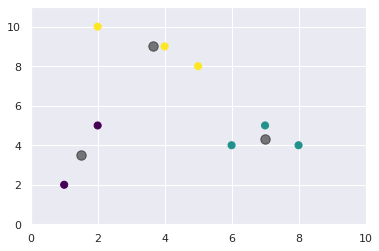

In [ ]:
# from sklearn.datasets import make_blobs
# X, y_true = make_blobs(n_samples=300, centers=4,
#                        cluster_std=0.6, random_state=0)
plt.axis([0, 10, 0, 11])
plt.scatter(dataset_1[:, 0], dataset_1[:, 1], c=kmeans.cluster_labels, s=50, cmap='viridis');
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], c='black', s=90, alpha=0.5);

From the plot above we see that centroids are already in the mean position of their corresponding clusters. Thus we conclude we are already converged in just 1 epoch. To verify this we will run the model for 2 more epochs

In [ ]:
# Now run the K-means for 2 epochs
kmeans = KMeansClustering(num_of_clusters=3, num_of_epochs=2)
kmeans.form_clusters(dataset_1, init_centroids = centroids)
kmeans.cluster_labels

[2, 0, 1, 2, 1, 1, 0, 2]

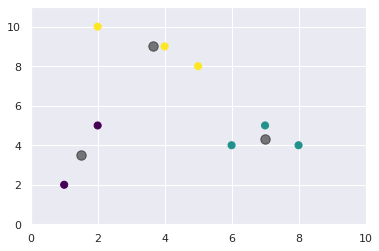

In [ ]:
# Lets plot the results
plt.axis([0, 10, 0, 11])
plt.scatter(dataset_1[:, 0], dataset_1[:, 1], c=kmeans.cluster_labels, s=50, cmap='viridis');
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], c='black', s=90, alpha=0.5);

In [ ]:
# Now run the K-means for 3 epochs
kmeans = KMeansClustering(num_of_clusters=3, num_of_epochs=3)
kmeans.form_clusters(dataset_1, init_centroids = centroids)
kmeans.cluster_labels

[2, 0, 1, 2, 1, 1, 0, 2]

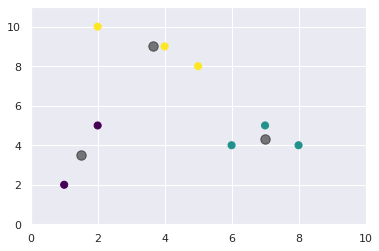

In [ ]:
# Lets plot the results
plt.axis([0, 10, 0, 11])
plt.scatter(dataset_1[:, 0], dataset_1[:, 1], c=kmeans.cluster_labels, s=50, cmap='viridis');
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], c='black', s=90, alpha=0.5);

From the subsequent plots of two latter epochs we conclude that we indeed need just 1 epoch to converge

Now run the K-means clustering on the second dataset

In [ ]:
# Since we had two classes in our dataset, that is, 0 meaning person has heart disease, and 1 meaning person with no heart disease,
# we aim to have two clusters.
# We could just randomly initialize two centroid, howver, since we need to calculate accuracy later on, we
# will rather want to randomly pick one data point from the set where target is 0 (that is no heart disease), and 1 data point
# where the target is 1. This way, we can keep track of cluster labels

In [ ]:
def init_random_centroids(X_train, Y_train):
  # This function will return TWO random centroids each from TWO different labels
  # so that we can calculate accuracy of a binary K means clustering model
  # Please note that the first centroid will correspond to label 0, and the
  #  second centroid will correspond to label 1
  temp_1 = [i for i in range(0, X_train.shape[0]) if (Y_train[i][0] == 0) ]
  temp_2 = [i for i in range(0, X_train.shape[0]) if (Y_train[i][0] == 1) ]

  return np.array([X_train[random.choice(temp_1)], X_train[random.choice(temp_2)]])



In [ ]:
centroids = init_random_centroids(dataset_2_feat_matrix_train, dataset_2_target_vector_train)

In [ ]:
# Let's now train the model with the training data
kmeans = KMeansClustering(num_of_clusters=2, num_of_epochs=20000)
kmeans.form_clusters(dataset_2_feat_matrix_train, init_centroids = centroids)

In [ ]:
# Now lets make predictions on the test data set
predicted_labels = kmeans.predict(dataset_2_feat_matrix_test)

Shown below is the plot of ’sbp’ vs ’tobacco’ to represent the predicted data points with different color
to show the two classes.

In [ ]:
kmeans.num_of_epoch_to_converge

7

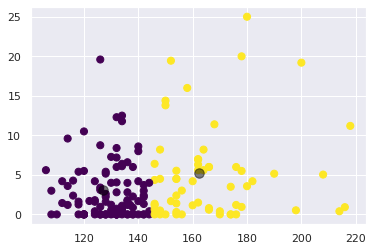

In [ ]:
# Lets plot the predicted results
# plt.axis([0, 10, 0, 11])
plt.scatter(dataset_2_feat_matrix_test[:, 0], dataset_2_feat_matrix_test[:, 1], c=predicted_labels, s=50, cmap='viridis');
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], c='black', s=90, alpha=0.5);

Ans to Q7. Shown below is the plot of ’sbp’ vs ’tobacco’ to represent the actual data points with different color
to show the two classes.

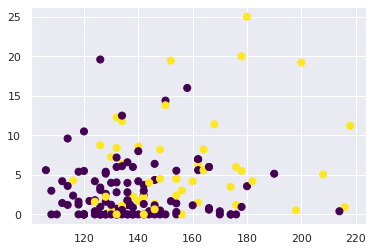

In [ ]:
# Lets plot the actual labels
# plt.axis([0, 10, 0, 11])
plt.scatter(dataset_2_feat_matrix_test[:, 0], dataset_2_feat_matrix_test[:, 1],
            c=dataset_2_target_vector_test.reshape((dataset_2_target_vector_test.shape[0],)), s=50, cmap='viridis');
# plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], c='black', s=90, alpha=0.5);

In [ ]:
# Let's calculate the accuracy
tn, fp, fn, tp = confusion_matrix(dataset_2_target_vector_test.reshape((dataset_2_target_vector_test.shape[0],)),
                                  predicted_labels).ravel()
accuracy_k_means = (tp+tn)/(tp+tn+fp+fn)
accuracy_k_means

0.6790123456790124

So the accuracy was about 67 percent

<a name="nearest-neighbour-clustering"></a>
#Part B: Nearest Neighbour Clustering

In [ ]:
# Mow we implement the Neerest Neighbour algo

In [ ]:
class NearestNeighbourClustering:
  def __init__(self, threshold):
    self.threshold = threshold
    self.clusters = [] # Will be a python list in this fromat: [[[1,4], [12,5], [29,7]] , [[12,6], [23,8]]]
    self.cluster_labels = [] # Will list the cluster label for each data points within the data set. Say, we have 2 cluster, then label
                                    #  can either be 0 or 1
    self.clust_dict = None # Might ve helpful for lookups during the calculation

  def form_clusters(self, X):
    i = 0
    while (i < X.shape[0]):
      dist = calculate_euclidean_distance(X[i], np.array([X[k] for k in range(0, i)]))
        #Now find out the lowest distance, and check if this distance is lessthan or equal to the threshold
      if (dist is not None):
        idx = np.argmin(dist)
      else: # the very first point case.For the first sample edge case: Meaning this is the distance to itself, hence put this point in a  cluster where this point is the only member
        self.clusters.append([X[i]])
        self.cluster_labels.append(len(self.clusters) - 1) # IMPORTANT: meaning that the first data point will always be put in the first cluster
        i+=1
        continue
      if (dist[idx] > self.threshold):
        # Put this point in a seperate cluster
        self.clusters.append([X[i]])
        self.cluster_labels.append(len(self.clusters) - 1) # IMPORTANT: Cluster label starts from 0
      elif (dist[idx] <= self.threshold):
          cluster_idx = self.cluster_labels[idx] # basically the cluster index of the cluster where I can put this point into
          self.clusters[cluster_idx].append(X[i]) #
          # Added the line bwlow to fix the out of bound error
          self.cluster_labels.append(cluster_idx)
      i += 1
  def predict(self, X_test, X_train):
    # Args:
    # X_test : the test dataset with features only
    # X_train: the train dataset with features only
    # Returns: a numpy array of shape (n,) where n is the num of samples in the train dataset. Each
    #          element of this array is the predicted cluster label for the corresponding sample

    j = 0
    pred_cluster_labels = []
    while (j < X_test.shape[0]):
      # First calculate distance from this test data point to all the points in training dataset
      distances = calculate_euclidean_distance(X_test[j], X_train)
      # Now get the index where distance is the lowest
      closest_neigh_idx = np.argmin(distances)
      # Label this point's cluster the same as this closest point
      pred_cluster_labels.append(self.cluster_labels[closest_neigh_idx])
      j += 1
    return pred_cluster_labels

In [ ]:
nearest_neigh = NearestNeighbourClustering(threshold = 4)

In [ ]:
nearest_neigh.form_clusters(dataset_1)

In [ ]:
nearest_neigh.cluster_labels

[0, 1, 2, 0, 2, 2, 1, 0]

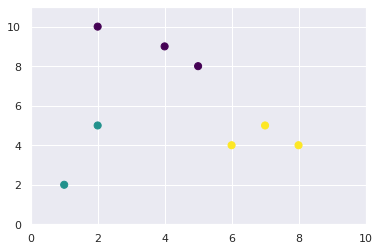

In [ ]:
# Now let's plot the results
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling

plt.axis([0, 10, 0, 11])
plt.scatter(dataset_1[:, 0], dataset_1[:, 1], c=nearest_neigh.cluster_labels, s=50, cmap='viridis');
# plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], c='black', s=90, alpha=0.5);

From above, we see that we indeed got the same result as the K-means clustering

In [ ]:
# From above, we see that we indeed got the same result as the K-means clustering

 In K-Means Clustering we needed to calculate distance of each point to each of the centroids to determine which cluster each point belongs to. in contrast, in Nearest Neighbour, we must calculate distance from each point to all the other data points. This means for large datset, the overhead of distance calclulation will be significant, and the learning will take much longer time compared to K-means clustering.

Before we perform nearest neighbour clustering on the Dataset 2, we take note of the euclidean distances from the very first data point to all the other data points in the training set. Since nearest neighbour algorithm uses just distance as its hyperparameter, we will use the the median of these distance values as the hyperparameter t. In this way, we expect to generate two seperate clusters

In [ ]:
median_distance = np.median(calculate_euclidean_distance(dataset_2_feat_matrix_train[0], dataset_2_feat_matrix_train))
median_distance

30.077988415789015

In [ ]:
nearest_neigh = NearestNeighbourClustering(threshold = median_distance)
nearest_neigh.form_clusters(dataset_2_feat_matrix_train)

In [ ]:
np.unique(nearest_neigh.cluster_labels)

array([0, 1])

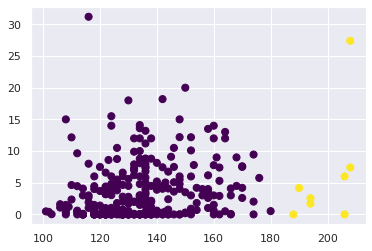

In [ ]:
# Now let's plot the results
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling

# plt.axis([0, 10, 0, 11])
plt.scatter(dataset_2_feat_matrix_train[:, 0], dataset_2_feat_matrix_train[:, 1], c=nearest_neigh.cluster_labels, s=50, cmap='viridis');
# plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], c='black', s=90, alpha=0.5);

In [ ]:
# Now we will calculate this nearest neighbour model's accuracy using the training data set

In [ ]:
predicted_cluster_labels = nearest_neigh.predict(dataset_2_feat_matrix_test, dataset_2_feat_matrix_train)

In [ ]:
# Let's calculate the accuracy
tn, fp, fn, tp = confusion_matrix(dataset_2_target_vector_test.reshape((dataset_2_target_vector_test.shape[0],)),
                                  predicted_cluster_labels).ravel()
accuracy_nearest_neigh = (tp+tn)/(tp+tn+fp+fn)
accuracy_nearest_neigh

0.7098765432098766

The accuracy was about 71 percent

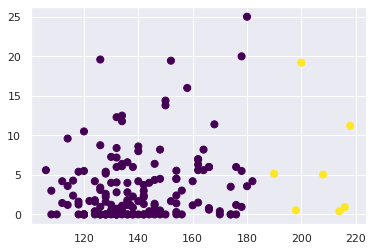

In [ ]:
# Now let's plot the results
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling

# plt.axis([0, 10, 0, 11])
plt.scatter(dataset_2_feat_matrix_test[:, 0], dataset_2_feat_matrix_test[:, 1], c=predicted_cluster_labels, s=50, cmap='viridis');
# plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], c='black', s=90, alpha=0.5);


<a name="DB-scan-clustering"></a>
# Part C: DB-Scan clustering

In [ ]:
class DBScanClustering:
  def __init__(self, epsilon, min_points):
    self.epsilon = epsilon
    self.min_points = min_points
    self.clusters = [] # Will be a python list in this fromat: [[[1,4], [12,5], [29,7]] , [[12,6], [23,8]]]
    self.cluster_labels = None # Will list the cluster label for each data points within the data set. Say, we have 2 cluster, then label
                                    #  can either be 0 or 1. please note that noise points will have a label of 0
    self.clust_dict = None # Might ve helpful for lookups during the calculation

  def check_neighbours(self, point_idx, data_X_train):
    # Args:
    # point_idx: index of the point whose neighbourhood we want to check. It is a single non-negative int
    # data_X_train: training data set (features only)
    # Return values:
    # neighbours_idx, is_core_point, is_border_point, is_noise_point, where neighbours_idx is a np array in format: [n1, n2, n3....]

    # First get the euclidean distances from this point to all the other points
    distances = calculate_euclidean_distance(data_X_train[point_idx], data_X_train)
    # Find the idx where the distance is equal or below the epsilon
    idx = [i for i in range(distances.shape[0]) if ((distances[i] != 0) and (distances[i] <= self.epsilon))]
    idx = np.array(idx)

    if (idx.shape[0] >= self.min_points-1): # -1 is because minpoint calculation always includes this point
      return idx, True, False, False
    elif ((idx.shape[0] < self.min_points-1) and (idx.shape[0] > 0)):
      return idx, False, True, False
    elif (idx.shape[0] == 0):
      return idx, False, False, True

  def form_cluster(self, data_X_train):
    # At first create a list that needs to be visisted (in index form)
    unvisited_point_idx = [i for i in range(data_X_train.shape[0])] # Initialization like this because at the beginning ALL points need to be visited
    stack = set()
    # Initialize the cluster labels for each point to NaN as we have not started the algo yet
    self.cluster_labels = np.array([np.nan for _ in range(data_X_train.shape[0])])

    cluster_label = 1 # Initialization of the cluster label
    while (len(unvisited_point_idx) != 0) :
      # A flag that tells us if we have begun to form a new cluster (which starts whenever we find a core point)
      cluster_initialized = False
      # Pick a point at random from the unvisited_point_idx
      # and push this point as "to be visited" on the stack
      stack.add(random.choice(unvisited_point_idx))

      while(len(stack) != 0):
        point_idx = stack.pop()
        neighbours_idx, is_core_point, is_border_point, is_noise_point = self.check_neighbours(point_idx, data_X_train)
        # Now remove this point from unvisited list of points
        unvisited_point_idx.remove(point_idx)

        if (is_border_point and (not (cluster_initialized))):
          # If we find a point which has less than min_points num of neighbours, and
          # none of its neighbours are core points

          # First mark it as a noise point
          self.cluster_labels[point_idx] = 0
          # Also, mark all of its neighbours as noise points
          for i in range(neighbours_idx.shape[0]):
            self.cluster_labels[neighbours_idx[i]] = 0

          # Now remove this point from unvisited list of points
          # unvisited_point_idx.remove(point_idx)
          # Also mark this point's neighbours as visited
          unvisited_point_idx = [i for i in unvisited_point_idx if i not in neighbours_idx]
          continue

        # Now remove this point from unvisited list of points
        # unvisited_point_idx.remove(point_idx)

        if (is_core_point):
          # If core point then push this core point's neighbours which are alos UNVISITED, on the stack
          stack.update( set(neighbours_idx) & set(unvisited_point_idx))
          # Now put a label regarding the cluster with this point
          self.cluster_labels[point_idx] = cluster_label
          # IMPORTANT: May need to add additional flag when this is core point
          cluster_initialized = True

        elif (is_noise_point):
          # Meaning this point has no neighbours
          # Just label this point's cluster
          self.cluster_labels[point_idx] = 0 # 0 means this is a noise or outlier
          continue
        elif (is_border_point):
          # Just label this point as the same one as the very first core point that also belongs the cluster this border point
          # belongs to
          self.cluster_labels[point_idx] = cluster_label
          # No need to visit its neighbour
          continue
      # If we have visited all the points within a cluster, then we need to ensure the next cluster label will be different
      if (cluster_initialized):
        cluster_label += 1

  def predict(self, X_test, X_train):
    # Args:
    # X_test : the test dataset with features only
    # X_train: the train dataset with features only
    # Returns: a numpy array of shape (n,) where n is the num of samples in the train dataset. Each
    #          element of this array is the predicted cluster label for the corresponding sample


    j = 0
    pred_cluster_labels = []
    while (j < X_test.shape[0]):
      # First calculate distance from this point to all the points in train the dataset
      distances = calculate_euclidean_distance(X_test[j], X_train)
      # Now get the index where distance is the lowest
      neigh_idx = [i for i in range(distances.shape[0]) if (distances[i] <= self.epsilon)]
      if (len(neigh_idx) == 0): # If no neighbours
        pred_cluster_labels.append(0) # 0 means that this is an outlier
      else:
        closest_point_idx = np.argmin(distances[neigh_idx])
        closest_point_idx = neigh_idx[closest_point_idx]
        pred_cluster_labels.append(int(self.cluster_labels[closest_point_idx]))
      j += 1
    return pred_cluster_labels


In [ ]:
# Let's perform clustering on dataset 1 using epsilon = 2, and minpoints = 2

In [ ]:
dbs = DBScanClustering(2,2)
dbs.form_cluster(dataset_1)

In [ ]:
dbs.cluster_labels

array([0., 0., 1., 2., 1., 1., 0., 2.])

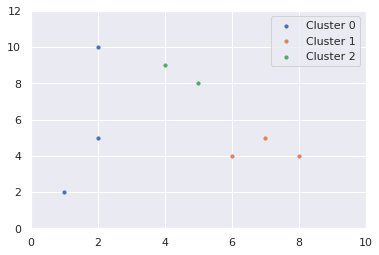

In [ ]:
# Now visualize the result
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
plt.axis([0, 10, 0, 12])

for clust in np.unique(dbs.cluster_labels):
  if (clust == 0):#To mark the noise or outliers
    temp = dataset_1[dbs.cluster_labels == clust]
    plt.scatter(temp[:,0], temp[:, 1], s=10, label=f"Noise")
  else:
    temp = dataset_1[dbs.cluster_labels == clust]
    plt.scatter(temp[:,0], temp[:, 1], s=10, label=f"Cluster{clust}")

plt.legend([f"Cluster {int(clust)}" for clust in np.unique(dbs.cluster_labels)], loc ="upper right")


The plot of the DB Scan clustering on dataset 1 with epsilon = 2, and minpoint = 2. Please note that *Cluster 0* means outliers or noise

In [ ]:
# Let perform the DBscan with epsilon = sqrt(10), and minPoints = 2, and plot the result

In [ ]:
dbs = DBScanClustering(np.sqrt(10),2)
dbs.form_cluster(dataset_1)

In [ ]:
dbs.cluster_labels

array([1., 2., 3., 1., 3., 3., 2., 1.])

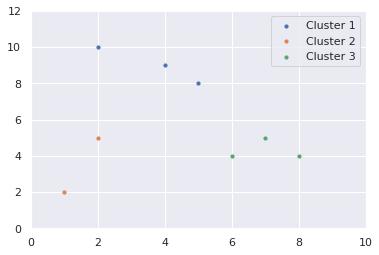

In [ ]:
# Now visualize the result
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
plt.axis([0, 10, 0, 12])

for clust in np.unique(dbs.cluster_labels):
  if (clust == 0):#To mark the noise or outliers
    temp = dataset_1[dbs.cluster_labels == clust]
    plt.scatter(temp[:,0], temp[:, 1], s=10, label=f"Noise")
  else:
    temp = dataset_1[dbs.cluster_labels == clust]
    plt.scatter(temp[:,0], temp[:, 1], s=10, label=f"Cluster{clust}")

plt.legend([f"Cluster {int(clust)}" for clust in np.unique(dbs.cluster_labels)], loc ="upper right")

Plot shown above for epsilon = sqrt(10), and and minpoint = 2

In [ ]:
# Now train the DBScan model with SBP and tobacco features of dataset 2 feature train set
# Since we must set epsilon and min_points before we train, we need to use the insights we gained from dataset 2 when we trained the Nearest Neighbour model with it.
# Since epsilon is the distance measure similar to that of t in nearest neighbour, we will again use the median distance (median value of the distance from the very first sample
# to all the other samples in the train set) as epsilon. Next we will pick the minpoints to be approximately half of the number of the samples in the train set. Approximately half
#  is to take the outliers into account. So in practice it will be slightly lower.
dbs = DBScanClustering(median_distance,120)
dbs.form_cluster(dataset_2_feat_matrix_train)

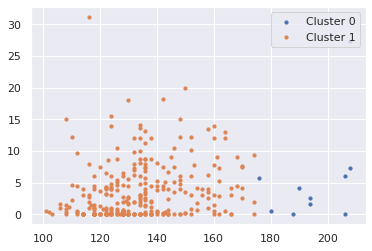

In [ ]:
# Now visualize the train result
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
# plt.axis([0, 10, 0, 12])

for clust in np.unique(dbs.cluster_labels):
  if (clust == 0):#To mark the noise or outliers
    temp = dataset_2_feat_matrix_train[dbs.cluster_labels == clust]
    plt.scatter(temp[:,0], temp[:, 1], s=10, label=f"Noise")
  else:
    temp = dataset_2_feat_matrix_train[dbs.cluster_labels == clust]
    plt.scatter(temp[:,0], temp[:, 1], s=10, label=f"Cluster{clust}")

plt.legend([f"Cluster {int(clust)}" for clust in np.unique(dbs.cluster_labels)], loc ="upper right")

In [ ]:
# Now let's predict using the DBScan model using the test data set
predicted_cluster_labels=np.array(dbs.predict(dataset_2_feat_matrix_test, dataset_2_feat_matrix_train))

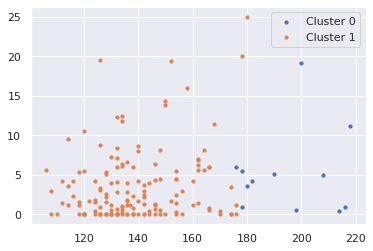

In [ ]:
# let's visualize the result
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling


for clust in np.unique(predicted_cluster_labels):
  if (clust == 0):#To mark the noise or outliers
    temp = dataset_2_feat_matrix_test[predicted_cluster_labels == clust]
    plt.scatter(temp[:,0], temp[:, 1], s=10, label=f"Noise")
  else:
    temp = dataset_2_feat_matrix_test[predicted_cluster_labels == clust]
    plt.scatter(temp[:,0], temp[:, 1], s=10, label=f"Cluster{clust}")

plt.legend([f"Cluster {int(clust)}" for clust in np.unique(predicted_cluster_labels)], loc ="upper right")

In [ ]:
# It is very important to note that in  our DBScan model, the outliers belongs to cluster label 0. While the test dataset's target column value is 0 when someone has heart disease
# So, actually, the cluster label 1 in our predictions correspond to label of 0 in the test data, while cluster label of 0  to test data label 1 which signifies a person with
# heart disease. This can be justified because there are much more people with no heart disease in our train dataset compared to numper of people with heart disease. Since the density
# of points where persons have no heart disease is much higher, our DBScan model labeled them as normal cluster, while the points which represent people with heart disease were
# identified as outliers or noise due to their lower density.

In [ ]:
# A custoom function is being defined because our DBScan model labeled positives as cluster 0, while negatives as cluster 1
def get_prediction_stats(pred_labels, actual_labels):
  i = 0
  tp = 0
  tn = 0
  fp = 0
  fn = 0
  while (i < pred_labels.shape[0]):
    # True positive case
    if ((pred_labels[i] == 0) and  (actual_labels[i] == 1)):
      tp+=1
    # True negative case
    elif ((pred_labels[i] == 1) and  (actual_labels[i] == 0)):
      tn +=1
    # False positive case
    elif ((pred_labels[i] == 0) and  (actual_labels[i] == 0)):
      fp +=1
    # false negative case
    elif ((pred_labels[i] == 1) and  (actual_labels[i] == 1)):
      fn += 1
    i += 1
  return tp, tn, fp, fn


In [ ]:
# Now calculate accuracy for this DBScan model

In [ ]:
tp, tn, fp, fn = get_prediction_stats(predicted_cluster_labels, dataset_2_target_vector_test.reshape((dataset_2_target_vector_test.shape[0],)))

In [ ]:
accuracy_db_scan = (tp+tn)/(tp+fp+tn+fn)

In [ ]:
accuracy_db_scan

0.7160493827160493

In [ ]:
# For dataset 2: We note that our accuracy is about the same as compared to nearest neighbour model. However, it should be noted that we could further increase the accuracy by even
# finer tuning of the epsilon and the minpoints hyperparameter. However, this was performed due to the extent of trial and error or optimization aproach that may be required.
# On the other hand, the K-means clustering model's accuracy was about 67 % (lowest among the three). Since K-means clustering algorithm is very sensitive to outliers, and offers no
# distance measure hyperparameters, it mistakenly clustered number of points due to these outliers.
# For dataset 1: The K-means clustering algorithm's efficiency compared to the other two was noticeable because it only requires distance calculations between few given
# centroids and each of the data samples in the train set. That being said, by adjusting the hyperparameters properly, all three were able to give same and correct models.

For dataset 2, we note that our accuracy is about the same as compared to nearest neighbour model. However, it should be noted that we could further increase the accuracy by even finer tuning of the epsilon and the minpoints hyperparameter. However, this was performed due to the extent of trial and error or optimization aproach that may be required.

On the other hand, the K-means clustering model's accuracy was about 67 % (lowest among the three). Since K-means clustering algorithm is very sensitive to outliers, and offers no distance measure hyperparameters, it mistakenly clustered number of points due to these outliers.

For dataset 1, The K-means clustering algorithm's efficiency compared to the other two was noticeable because it only requires distance calculations between few given centroids and each of the data samples in the train set. That being said, by adjusting the hyperparameters properly, all three were able to give same and correct models.

In [ ]:
from sklearn.cluster import KMeans
kmeans_sci_kit = KMeans(n_clusters=2, init='random' ,random_state=0, n_init=50).fit(dataset_2_feat_matrix_train)
predicted_cluster_labels_k_means= kmeans_sci_kit.predict(dataset_2_feat_matrix_test)

In [ ]:
# Now calculate accuracy for K-means
tn, fp, fn, tp = confusion_matrix(dataset_2_target_vector_test.reshape((dataset_2_target_vector_test.shape[0],)),
                                 predicted_cluster_labels_k_means ).ravel()
accuracy_k_means_sci_kit = (tp+tn)/(tp+tn+fp+fn)
accuracy_k_means_sci_kit

0.6790123456790124

In [ ]:
# Because Nearest neighbour algorithm is a special case of DBScan algorithm, where minpoint = 1, We will use the DBScan module
from sklearn.cluster import DBSCAN

nearest_neigh_sci_kit = DBSCAN(eps=median_distance, min_samples=1, algorithm = 'brute').fit(dataset_2_feat_matrix_train)
predicted_cluster_labels_nearest_neigh = nearest_neigh_sci_kit.labels_
# Since SciKit learn doesn't offer any method for predicting cluster labels, we will define a custom function for that

In [ ]:
def db_scan_predict(X_test, X_train, cluster_labels, epsilon):
    # Args:
    # X_test : the test dataset with features only
    # X_train: the train dataset with features only
    # cluster_labels: predicted cluster labels
    # epsilon: the epsilon param used in DBScan. Specify t value if used for Nearest Neighbour prediction
    # Returns: a numpy array of shape (n,) where n is the num of samples in the train dataset. Each
    #          element of this array is the predicted cluster label for the corresponding sample


    j = 0
    pred_cluster_labels = []
    while (j < X_test.shape[0]):
      # First calculate distance from this point to all the points in train the dataset
      distances = calculate_euclidean_distance(X_test[j], X_train)
      # Now get the index where distance is the lowest
      neigh_idx = [i for i in range(distances.shape[0]) if (distances[i] <= epsilon)]
      if (len(neigh_idx) == 0): # If no neighbours
        pred_cluster_labels.append(0) # 0 means that this is an outlier
      else:
        closest_point_idx = np.argmin(distances[neigh_idx])
        closest_point_idx = neigh_idx[closest_point_idx]
        pred_cluster_labels.append(int(cluster_labels[closest_point_idx]))
      j += 1
    return pred_cluster_labels

In [ ]:
predicted_cluster_labels_nearest_neigh = db_scan_predict(dataset_2_feat_matrix_test, dataset_2_feat_matrix_train, predicted_cluster_labels_nearest_neigh, epsilon = median_distance )

In [ ]:
# Now calculate accuracy
tn, fp, fn, tp = confusion_matrix(dataset_2_target_vector_test.reshape((dataset_2_target_vector_test.shape[0],)),
                                 predicted_cluster_labels_nearest_neigh ).ravel()
accuracy_nearest_neigh_sci_kit = (tp+tn)/(tp+tn+fp+fn)
accuracy_nearest_neigh_sci_kit

0.691358024691358

In [ ]:
# Now calculate the accuracy for DB-Scan model

In [ ]:
DB_Scan_sci_kit = DBSCAN(eps=median_distance, min_samples=120, algorithm = 'brute').fit(dataset_2_feat_matrix_train)
predicted_cluster_labels_db_scan = DB_Scan_sci_kit.labels_
predicted_cluster_labels_db_scan = db_scan_predict(dataset_2_feat_matrix_test, dataset_2_feat_matrix_train, predicted_cluster_labels_db_scan, epsilon = median_distance )
# Now we can't directly use confusion metrics to calculate accuracy because, DB Scan can detect outliers, and labels them as -1. So we use a custom function to calculate accuracy

In [ ]:
# A custoom function is being defined because our DBScan model labeled positives as cluster 0, while negatives as cluster 1
def get_prediction_stats_sci_kit_db_scan(pred_labels, actual_labels):
  i = 0
  tp = 0
  tn = 0
  fp = 0
  fn = 0
  while (i < pred_labels.shape[0]):
    # True positive case
    if ( (pred_labels[i] != -1) and (pred_labels[i] == 1) and  (actual_labels[i] == 1)):
      tp+=1
    # True negative case
    elif ((pred_labels[i] != -1) and (pred_labels[i] == 0) and  (actual_labels[i] == 0)):
      tn +=1
    # False positive case
    elif ((pred_labels[i] != -1) and (pred_labels[i] == 1) and  (actual_labels[i] == 0)):
      fp +=1
    # false negative case
    elif ((pred_labels[i] != -1) and (pred_labels[i] == 0) and  (actual_labels[i] == 1)):
      fn += 1
    i += 1
  return tp, tn, fp, fn

In [ ]:
tp, tn, fp, fn = get_prediction_stats_sci_kit_db_scan(np.array(predicted_cluster_labels_db_scan), dataset_2_target_vector_test.reshape((dataset_2_target_vector_test.shape[0],)))
accuracy_db_scan_sci_kit = (tp+tn)/(tp+tn+fp+fn)
accuracy_db_scan_sci_kit

0.7070063694267515

In [ ]:
# So the Sci-kit learn accuracy values are:
print("Sci kit learn accuracy values:", "K means: ", accuracy_k_means_sci_kit,", nearest neighbour: ", accuracy_nearest_neigh_sci_kit, ", db scan",accuracy_db_scan_sci_kit)
print("Our accuracy values:", "K means: ", accuracy_k_means,", nearest neighbour: ", accuracy_nearest_neigh, ", db scan",accuracy_db_scan)

Sci kit learn accuracy values: K means:  0.6790123456790124 , nearest neighbour:  0.691358024691358 , db scan 0.7070063694267515
Our accuracy values: K means:  0.6790123456790124 , nearest neighbour:  0.7098765432098766 , db scan 0.7160493827160493


Based on the observation above we conclude that our implementations were correct, and closely resemble Sci-kit learn. Minor differences can be explained by possible run-time optimizations used in Sci-kit learn which could not be turned off.